## Problem Statement

You are a data scientist / AI engineer at a meteorological consulting firm. You have been provided with a dataset named **"weather_data.csv"**, which includes detailed records of various weather conditions. The dataset comprises the following columns:

- **`hours_sunlight:`** The total number of hours of sunlight received in a day.
- **`humidity_level:`** The humidity level as a percentage.
- **`daily_temperature:`** The temperature recorded at the end of the day in degrees Celsius.

Your task is to use this dataset to build a linear regression model to predict the daily temperature based on the hours of sunlight and humidity level.

**Import Necessary Libraries**

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


### Task 1: Train a Linear Regression with Single Variable

1. Import the data from the "weather_data.csv" file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Create a Linear Regression model and fit it using only the `hours_sunlight` variable to predict `daily_temperature`.
5. Print the model's coefficient and intercept.
6. Predict the daily temperature with the following hours of sunlight:
   - 5 hours
   - 8 hours
   - 12 hours

In [2]:
# Step 1: Import the data from the "weather_data.csv" file and store it in a variable 'df'
df = pd.read_csv("weather_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} cols")
display(df.head())
print("\nMissing values:\n", df.isna().sum())

# Step 3: Display the first few rows of the dataset to get an overview


Shape: 49 rows × 3 cols


,hours_sunlight,humidity_level,daily_temperature
0,10.5,65,22.3
1,9.2,70,21.0
2,7.8,80,18.5
3,6.4,90,17.2
4,8.1,75,19.4



Missing values:
 hours_sunlight       0
humidity_level       0
daily_temperature    0
dtype: int64


In [3]:
# Step 4: Create a Linear Regression model and fit it using only the 'hours_sunlight' variable to predict 'daily_temperature'
#    X must be 2D (n_samples, n_features); y must be 1D
X = df[['hours_sunlight']]
y = df['daily_temperature']
model = LinearRegression()
model.fit(X,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
# Step 5: Print the model's coefficient and intercept
m = model.coef_[0]      # slope
b = model.intercept_    # intercept
print(f"\nLearned line: temperature = {b:.3f} + {m:.3f} * hours_sunlight")


Learned line: temperature = 8.534 + 1.368 * hours_sunlight


In [5]:
# Step 6: Predict the daily temperature for the following hours of sunlight: 5, 8, and 12
X_new = pd.DataFrame({'hours_sunlight': [5, 8, 12]})
y_hat = model.predict(X_new)
for h, t in zip(X_new['hours_sunlight'], y_hat):
    print(f"Predicted temperature for {h} hours sunlight: {t:.2f} °C")


# Print the predicted temperatures


Predicted temperature for 5 hours sunlight: 15.37 °C
Predicted temperature for 8 hours sunlight: 19.47 °C
Predicted temperature for 12 hours sunlight: 24.94 °C


/var/folders/8t/v0xt96g10w98qbs2bnl651bm0000gn/T/ipykernel_21240/4233755292.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_line = np.linspace(X.min()[0], X.max()[0], 200).reshape(-1, 1)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


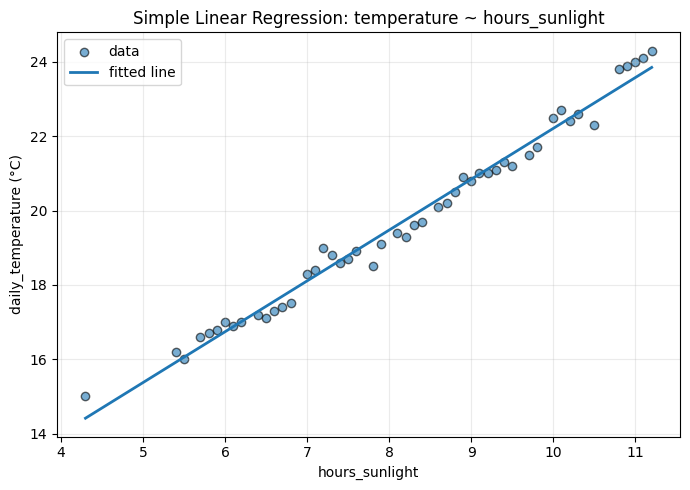

In [6]:
# 7) Plot data + fitted line 
plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.6, edgecolor="k", label="data")
# line over the observed range
x_line = np.linspace(X.min()[0], X.max()[0], 200).reshape(-1, 1)
plt.plot(x_line, model.predict(x_line), linewidth=2, label="fitted line")
plt.xlabel("hours_sunlight")
plt.ylabel("daily_temperature (°C)")
plt.title("Simple Linear Regression: temperature ~ hours_sunlight")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

### Task 2: Train a Linear Regression with Multiple Variable

- Create a Linear Regression model and fit it using both `hours_sunlight` and `humidity_level` variables to predict `daily_temperature`.
- Print the model's coefficients and intercept.
- Predict the daily temperature for the following conditions:
    - Hours of sunlight: 5 hours, Humidity level: 60%
    - Hours of sunlight: 8 hours, Humidity level: 75%
    - Hours of sunlight: 12 hours, Humidity level: 50%

In [7]:
#Step1: Create a Linear Regression model and fit it using both 'hours_sunlight' and 'humidity_level' variables to predict 'daily_temperature'
from sklearn.linear_model import LinearRegression

# Features (X) → now has 2 columns
X = df[['hours_sunlight', 'humidity_level']]

# Target (y)
y = df['daily_temperature']

# Model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
#Step2: Print the model's coefficients and interceptprint("Intercept (b):", model.intercept_)
print("Intercept (b):", model.intercept_)
print("Coefficients (m1, m2):", model.coef_)


Intercept (b): 14.833402427458852
Coefficients (m1, m2): [ 1.09803993 -0.05430624]


In [9]:
# Step3: Predict the daily temperature for the following conditions:
# Hours of sunlight: 5 hours, Humidity level: 60%
# Hours of sunlight: 8 hours, Humidity level: 75%
# Hours of sunlight: 12 hours, Humidity level: 50%
X_new = pd.DataFrame({
    'hours_sunlight': [5, 8, 12],
    'humidity_level': [60, 75, 50]
})

y_hat = model.predict(X_new)

for (h, hu), t in zip(X_new.values, y_hat):
    print(f"Sunlight={h} hrs, Humidity={hu}% → Predicted Temp: {t:.2f} °C")

Sunlight=5 hrs, Humidity=60% → Predicted Temp: 17.07 °C
Sunlight=8 hrs, Humidity=75% → Predicted Temp: 19.54 °C
Sunlight=12 hrs, Humidity=50% → Predicted Temp: 25.29 °C


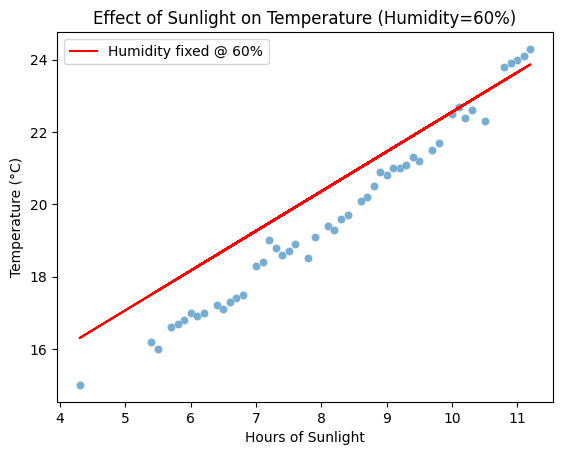

In [10]:
import seaborn as sns

# Example: Fix humidity at 60% and show sunlight vs temp
sns.scatterplot(x=df['hours_sunlight'], y=df['daily_temperature'], alpha=0.6)
plt.plot(
    df['hours_sunlight'],
    model.predict(pd.DataFrame({'hours_sunlight': df['hours_sunlight'], 'humidity_level': 60})),
    color='red', label="Humidity fixed @ 60%"
)
plt.xlabel("Hours of Sunlight")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.title("Effect of Sunlight on Temperature (Humidity=60%)")
plt.show()